### Алгоритм работы k-nearest neighbour (KNN)

параметры модели:

- n_neighbors — количество  соседей, по умолчанию 5.
- weights{'uniform', 'distance'} — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
- algorithm — алгоритм, используемый при подсчёте расстояния.
1. 'ball_tree' использует BallTree.
2. 'kd_tree' использует  KDTree.
3. 'brute' использует жадный алгоритм.
4. 'auto' выбирает оптимальный из вышепредставленных.
- leaf_size — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
- p — значение p-метрики Миньковского. Как мы знаем,  — расстояние Манхэттена (L1),  — Евклидово расстояние (L2). По умолчанию .
- metric — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
- n_jobs — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.

In [13]:
# Приведём пример: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

# Сформируем искусственные данные: 
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

In [14]:
# Отделим матрицу признаков и вектор-столбец правильных ответов: 

X = data.drop(['target'],axis = 1)
Y = data['target']

In [15]:
# Обучим kNN с тремя соседями:

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

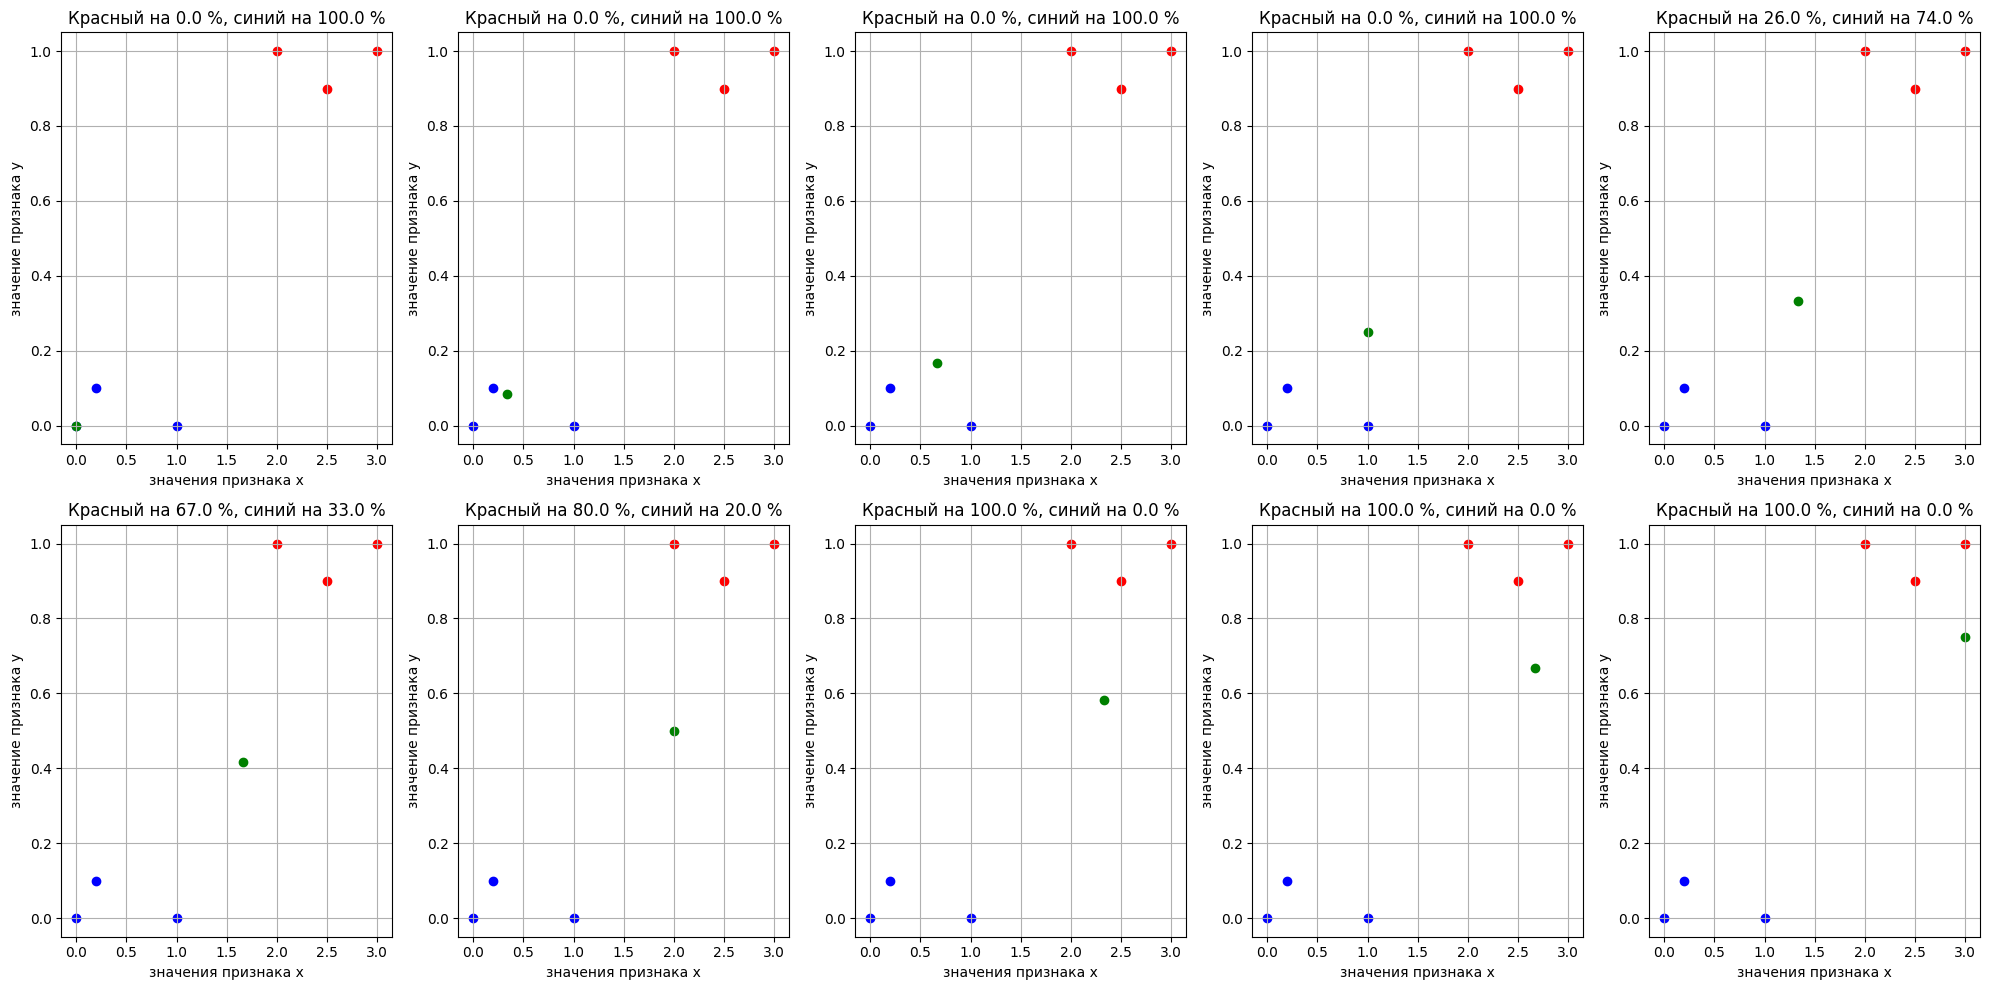

In [20]:
# Создадим сетку графиков 2x5
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Перебираем значения для графиков
for i, item in enumerate(np.linspace(0, 3, 10)):
    x = item
    y = item * 0.25
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x, y]])[0][1], 2) * 100  # вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x, y]])[0][0], 2) * 100  # вероятность принадлежности к синим
    ax = axs[i // 5, i % 5]
    ax.set_title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    ax.set_xlabel('значения признака x')
    ax.set_ylabel('значение признака y')
    ax.scatter(red.x.values, red.y.values, c='r')
    ax.scatter(blue.x.values, blue.y.values, c='b')
    ax.scatter(x, y, c='g')
    ax.grid()

plt.tight_layout()
plt.show()

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.

In [23]:
# В коде выше изменим объект модели:

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

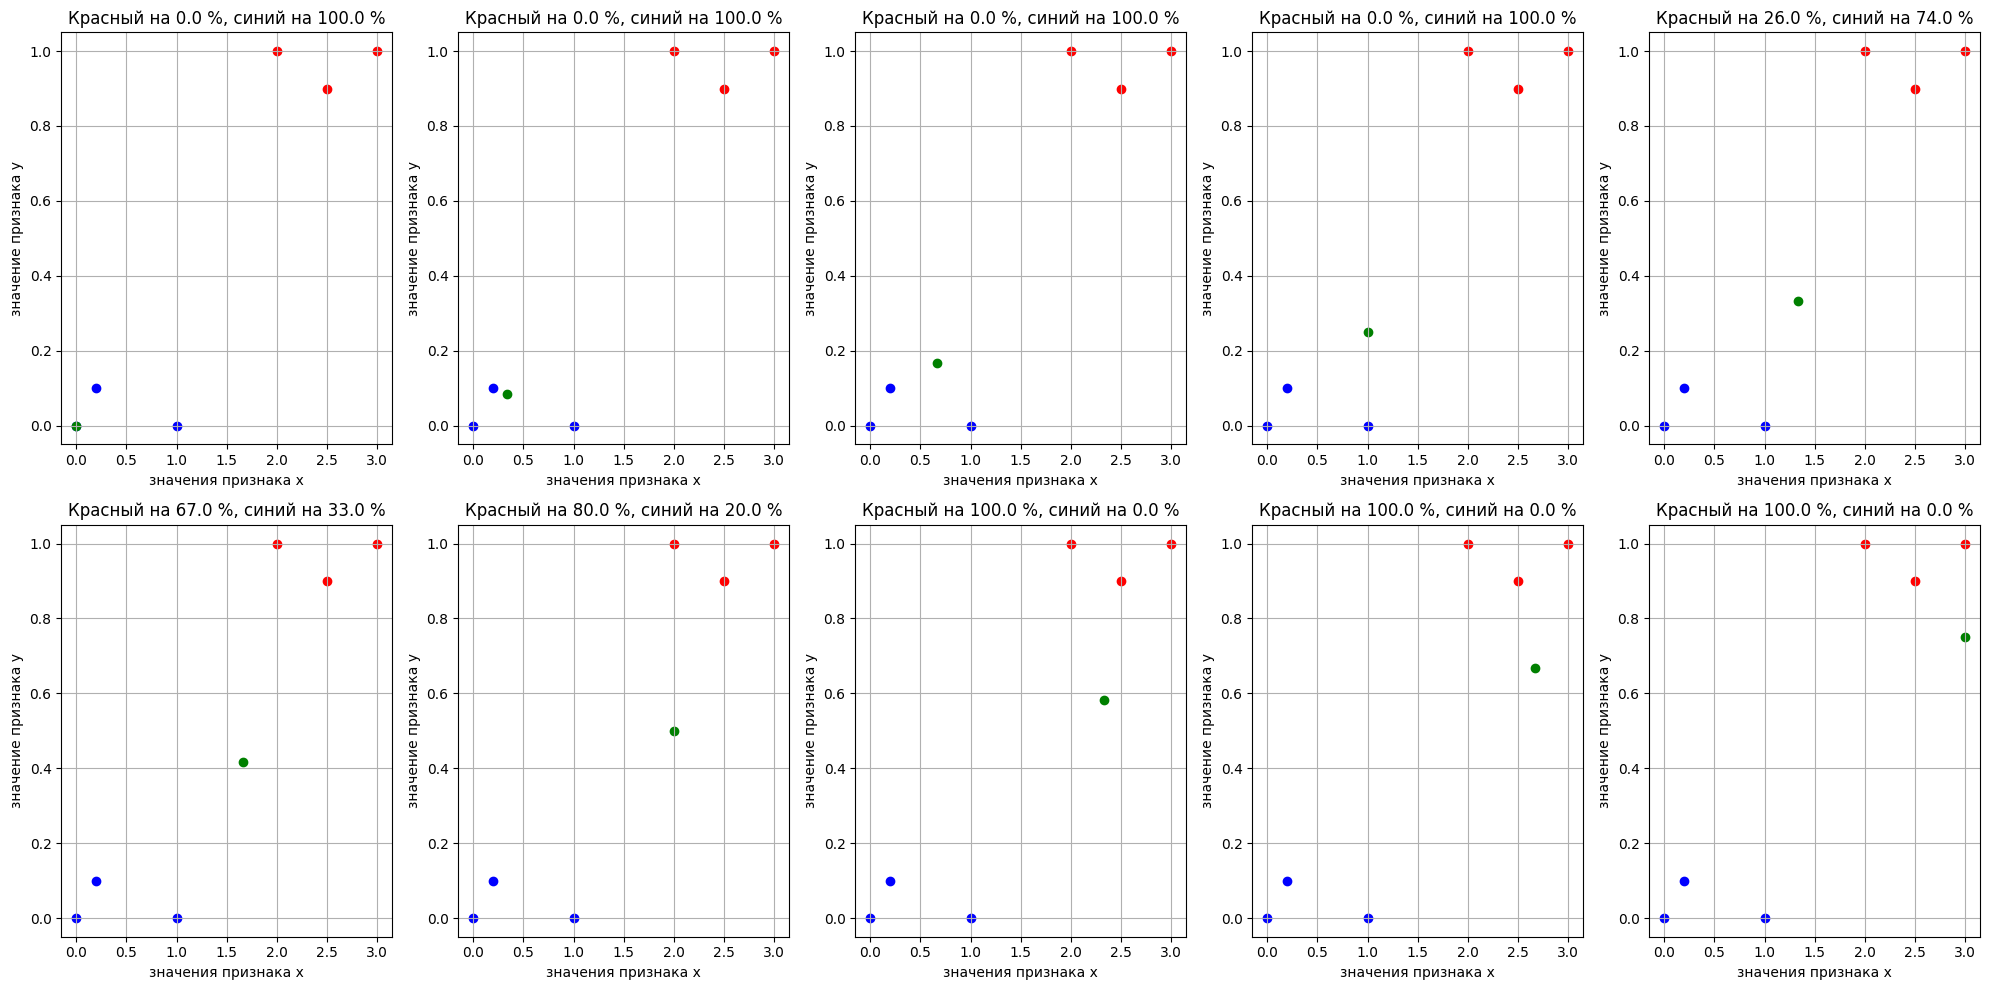

In [24]:
# Создадим сетку графиков 2x5
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Посмотрим на визуализацию исходных данных и работы модели по классификации точки. Вероятность принадлежности к классу можно вычислить методом predict_proba(), а само предсказание — методом predict:

    # Перебираем значения для графиков
for i, item in enumerate(np.linspace(0, 3, 10)):
    x = item
    y = item * 0.25
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x, y]])[0][1], 2) * 100  # вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x, y]])[0][0], 2) * 100  # вероятность принадлежности к синим
    ax = axs[i // 5, i % 5]
    ax.set_title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    ax.set_xlabel('значения признака x')
    ax.set_ylabel('значение признака y')
    ax.scatter(red.x.values, red.y.values, c='r')
    ax.scatter(blue.x.values, blue.y.values, c='b')
    ax.scatter(x, y, c='g')
    ax.grid()

plt.tight_layout()
plt.show()


Примечание. В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.

Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается среднее по ближайшим соседям. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.

Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 

### Снижение размерности

Снижение размерности

Снижение размерности также является основной задачей Metric Learning. Её суть заключается в снижении размерности признакового пространства с сохранением информативности для дальнейшей работы с уменьшенным признаковым пространством в различных задачах, например задачах классификации или кластеризации. 

Тем самым, мы можем найти некоторое пространство, в котором мы можем достаточно точно разделить наши объекты по кластерам/классам или вовсе найти такое представление данных, в которых наша задача будет решаться тривиальным образом. Чаще всего это требуется для задач, в которых ограничены ресурсы, например для вычисления моделей на мобильных устройствах, а также для большей интерпретируемости результатов модели. 

Тем самым мы, претерпевая небольшие потери в качестве моделей и данных, получаем гораздо менее ресурсоемкие результаты, которые можно далее визуализировать.

Основным методом снижения размерности в задачах кластеризации является PCA (principal component analysis, метод главных компонент), с которым мы познакомились в курсе ранее. 

Это один из самых интересных подходов в Metric Learning, так как мы ищем пространство меньшего размера, в котором будет максимально сохранена информация о дисперсии. В этом методе заключены преобразования пространства, поиск расстояний, проекция данных на полученный новый базис. 